In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


From the trained models we will extract feature importance scores from both waves. We will select all metabolites that were used during training (the number of metabolites that were used during training was determined by correlation analysis)

In [3]:
depression_model_wave1 = joblib.load("models/imputed_depression_model.pkl")
met_syndrome_model_wave1 = joblib.load("models/met_syndrome_model.pkl")
depression_model_wave5 = joblib.load("models/depression_model_wave5.pkl")
met_syndrome_model_wave5 = joblib.load("models/met_syndrome_model_wave5.pkl")

def get_feature_importance_based_on_gain(model):
    feature_importance = model.feature_importances_
    feature_names = model.get_booster().feature_names
    importance = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
    return importance

depression_importance_wave1 = get_feature_importance_based_on_gain(depression_model_wave1)
met_syndrome_importance_wave1 = get_feature_importance_based_on_gain(met_syndrome_model_wave1)
depression_importance_wave5 = get_feature_importance_based_on_gain(depression_model_wave5)
met_syndrome_importance_wave5 = get_feature_importance_based_on_gain(met_syndrome_model_wave5)

shared_metabolites_wave1 = set(depression_importance_wave1.index) & set(met_syndrome_importance_wave1 .index)
shared_metabolites_wave5 = set(depression_importance_wave5.index) & set(met_syndrome_importance_wave5 .index)

Because the column names in wave1 and wave5 are different, we need to map it to find the shared metabolites found in both waves

In [4]:
def map_and_find_shared(var1, var2):
    mapping = {v.replace('a', 'e').replace('_', ''): v for v in var1}
    var2_set = set(var2)
    shared = [mapping[v2] for v2 in var2 if v2 in mapping]

    return shared


shared_metabolites = map_and_find_shared(shared_metabolites_wave1, shared_metabolites_wave5)
print("Shared metabolites:", shared_metabolites)
print(len(shared_metabolites))


Shared metabolites: ['aL_VLDL_TG', 'aXL_VLDL_L', 'aM_VLDL_L', 'aM_VLDL_C', 'aL_HDL_PL', 'aXXL_VLDL_L', 'aS_VLDL_PL', 'aL_VLDL_C', 'aXL_VLDL_CE', 'aHDL_C', 'aIDL_TG', 'aM_VLDL_CE', 'aXL_VLDL_C', 'aVLDL_TG', 'aL_VLDL_L', 'aXL_HDL_L', 'aS_HDL_TG', 'aS_VLDL_L', 'aGp', 'aM_HDL_TG', 'aXXL_VLDL_C', 'aVLDL_C', 'aXXL_VLDL_FC', 'aTyr', 'aL_HDL_CE', 'aSerum_TG', 'aHDL2_C', 'aL_HDL_C', 'aS_LDL_TG', 'aS_VLDL_FC', 'aXL_VLDL_TG', 'aXL_HDL_PL', 'aMUFA', 'aXL_HDL_C', 'aS_VLDL_CE', 'aL_VLDL_FC', 'aL_VLDL_CE', 'aL_HDL_FC', 'aL_HDL_L', 'aXXL_VLDL_CE', 'aSFA', 'aL_VLDL_PL', 'aApoB', 'aM_VLDL_FC', 'aXS_VLDL_TG', 'aHDL_D', 'aM_VLDL_TG', 'aLeu', 'aTotFA', 'aIle', 'aM_VLDL_PL', 'aGlc', 'aXL_VLDL_FC', 'aXL_HDL_FC', 'aXXL_VLDL_TG', 'aXXL_VLDL_PL', 'aHDL_TG', 'aXL_VLDL_PL', 'aVLDL_D', 'aS_VLDL_TG', 'aS_VLDL_C']
61


In [5]:
experts_opinion_wave1 = ['aHDL_C', 'aLDL_C', 'aSerum_C', 'aSerum_TG', 'aLDL_TG', 'aApoA1', 'aApoB', 'aTotFA', 'aIle', 'aGp']
experts_opinion_wave5 = ['eHDLC', 'eLDLeC', 'eSerumC', 'eSerumTG', 'eLDLTG', 'eApoA1', 'eApoB', 'eTotFA', 'eIle', 'eGp']
result_wave1 = list(set(shared_metabolites_wave1)&set(experts_opinion_wave1))
result_wave5 = list(set(shared_metabolites_wave5)&set(experts_opinion_wave5))
both_waves = list(set(shared_metabolites)&set(experts_opinion_wave1))
print(f"[Wave 1] shared metabolites with expert opinions: {result_wave1} within {len(depression_importance_wave1)} metabolites")
print(f"[Wave 5] shared metabolites with expert opinions: {result_wave5} within {len(depression_importance_wave5)} metabolites")
print(f"Shared metabolites in both waves with expert opinions: {both_waves}")

[Wave 1] shared metabolites with expert opinions: ['aSerum_TG', 'aTotFA', 'aHDL_C', 'aIle', 'aGp', 'aLDL_TG', 'aApoB'] within 104 metabolites
[Wave 5] shared metabolites with expert opinions: ['eApoB', 'eGp', 'eTotFA', 'eIle', 'eSerumTG', 'eHDLC', 'eApoA1'] within 121 metabolites
Shared metabolites in both waves with expert opinions: ['aSerum_TG', 'aTotFA', 'aHDL_C', 'aIle', 'aGp', 'aApoB']


Here we plot the ranking importance of the shared metabolites found in both waves

In [6]:
def format_metabolite_names_wave1(names):
    return [name[1:].replace('_', '') + '' if name.startswith('a') else name.replace('_', '') for name in names]

def format_metabolite_names_wave5(names):
    return [name[1:].replace('_', '') + '' if name.startswith('e') else name.replace('_', '') for name in names]

def map_wave1_to_wave5(names):
    return [name.replace('a', 'e').replace('_', '') for name in names]

In [7]:
mapped_shared_metabolites = map_wave1_to_wave5(shared_metabolites)
formatted_names_wave1 = format_metabolite_names_wave1(shared_metabolites)
formatted_names_wave5 = format_metabolite_names_wave5(mapped_shared_metabolites)

In [8]:
importance_wave1 = pd.DataFrame({
    'Depression_Importance': depression_importance_wave1.loc[shared_metabolites],
    'Met_Syndrome_Importance': met_syndrome_importance_wave1.loc[shared_metabolites],
})
importance_wave1['Importance_Wave1'] = importance_wave1.mean(axis=1)
importance_wave1.index = formatted_names_wave1

importance_wave5 = pd.DataFrame({
    'Depression_Importance': depression_importance_wave5.loc[mapped_shared_metabolites],
    'Met_Syndrome_Importance': met_syndrome_importance_wave5.loc[mapped_shared_metabolites],
})
importance_wave5['Importance_Wave5'] = importance_wave5.mean(axis=1)
importance_wave5.index = formatted_names_wave5

In [9]:
valid_shared_metabolites_wave1 = list(set(shared_metabolites) & set(depression_importance_wave1.index) & set(met_syndrome_importance_wave1.index))
importance_wave1 = pd.DataFrame({
    'Depression_Importance': depression_importance_wave1.loc[valid_shared_metabolites_wave1],
    'Met_Syndrome_Importance': met_syndrome_importance_wave1.loc[valid_shared_metabolites_wave1],
})

formatted_names_wave1 = format_metabolite_names_wave1(valid_shared_metabolites_wave1)
importance_wave1.index = formatted_names_wave1


valid_shared_metabolites_wave5 = list(set(mapped_shared_metabolites) & set(depression_importance_wave5.index) & set(met_syndrome_importance_wave5.index))

importance_wave5 = pd.DataFrame({
    'Depression_Importance': depression_importance_wave5.loc[valid_shared_metabolites_wave5],
    'Met_Syndrome_Importance': met_syndrome_importance_wave5.loc[valid_shared_metabolites_wave5],
})


formatted_names_wave5 = format_metabolite_names_wave5(valid_shared_metabolites_wave5)

importance_wave5.index = formatted_names_wave5

# sort by the maximum importance score across both columns for baseline
importance_wave1['Max_Importance'] = importance_wave1.max(axis=1)
importance_wave1_sorted = importance_wave1.sort_values('Max_Importance', ascending=False)

# align FU based on the sorted index of baseline
importance_wave5_sorted = importance_wave5.loc[importance_wave1_sorted.index]

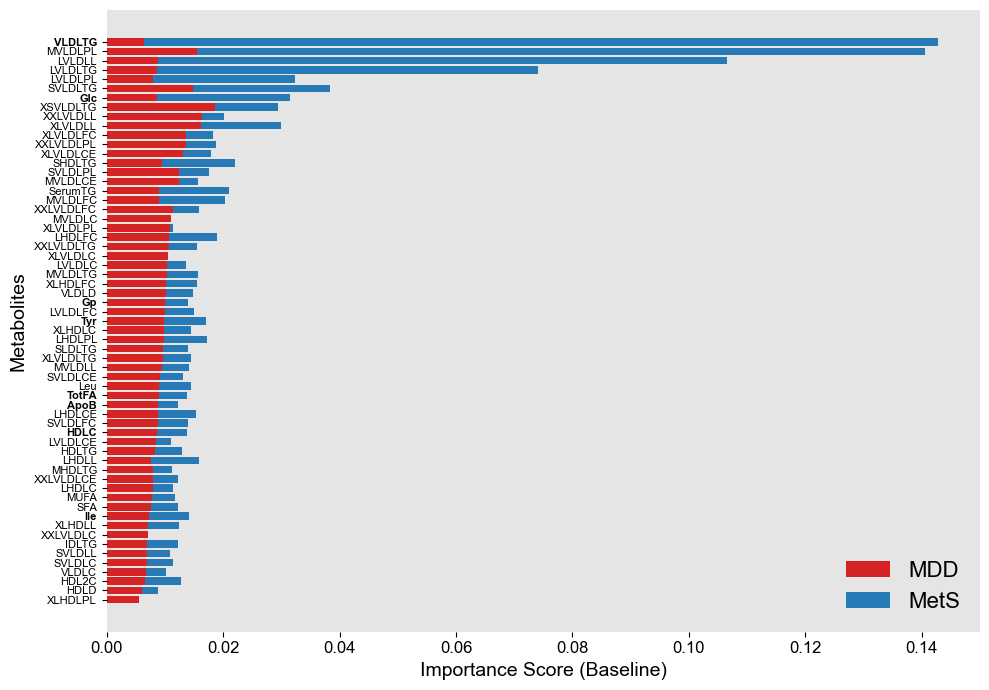

In [27]:
highlighted_metabolites = ['Gp', 'Glc', 'VLDLTG', 'Tyr', 'HDLC', 'ApoB', 'TotFA', 'Ile']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_facecolor('#E5E5E5')

ax1.barh(importance_wave1_sorted.index, importance_wave1_sorted['Depression_Importance'], 
         color='#D62425', label='MDD')
ax1.barh(importance_wave1_sorted.index, importance_wave1_sorted['Met_Syndrome_Importance'], 
         left=importance_wave1_sorted['Depression_Importance'], color='#287AB7', label='MetS')

ax1.set_xlabel('Importance Score (Baseline)', fontsize=14)
ax1.set_ylabel('Metabolites', fontsize=14)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=8)

for label in ax1.get_yticklabels():
    if label.get_text() in highlighted_metabolites:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')

plt.rcParams['font.family'] = 'Arial'
ax1.legend(fontsize=16, frameon=False)
ax1.invert_yaxis()

for spine in ax1.spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show()


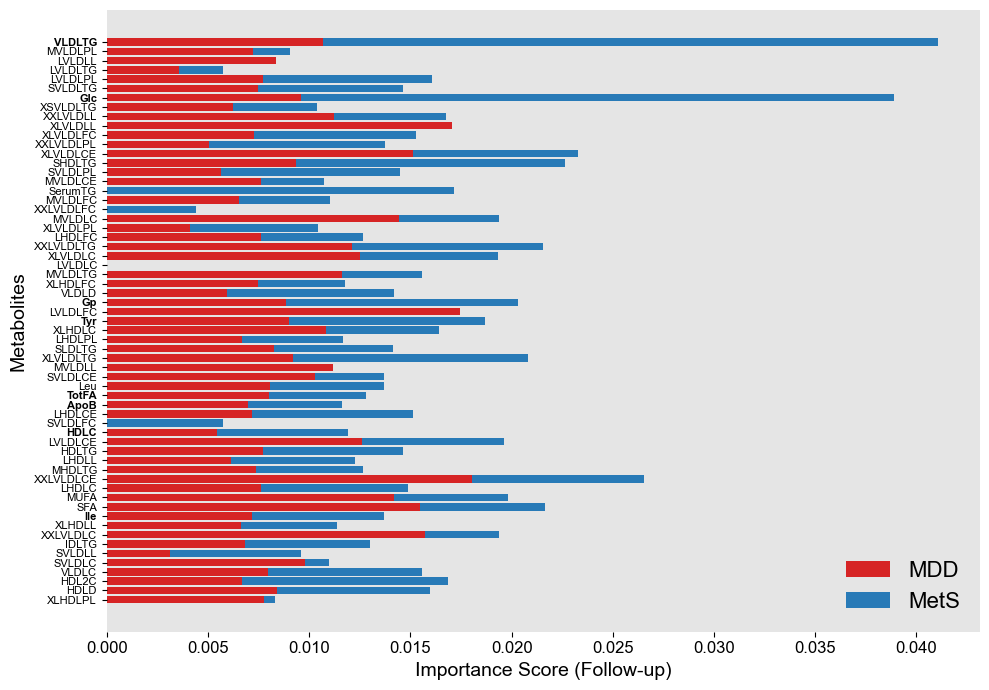

In [28]:
# Plot for Wave 5 (Follow-Up)
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_facecolor('#E5E5E5')

ax1.barh(importance_wave5_sorted.index, importance_wave5_sorted['Depression_Importance'], 
         color='#D62425', label='MDD')
ax1.barh(importance_wave5_sorted.index, importance_wave5_sorted['Met_Syndrome_Importance'], 
         left=importance_wave5_sorted['Depression_Importance'], color='#287AB7', label='MetS')

ax1.set_xlabel('Importance Score (Follow-up)', fontsize=14)
ax1.set_ylabel('Metabolites', fontsize=14)

ax1.tick_params(axis='x', labelsize=12) 
ax1.tick_params(axis='y', labelsize=8)
for label in ax1.get_yticklabels():
    if label.get_text() in highlighted_metabolites:
        label.set_fontweight('bold')
    else:
        label.set_fontweight('normal')
        
plt.rcParams['font.family'] = 'Arial'


ax1.legend(fontsize=16, frameon=False)
ax1.invert_yaxis()

for spine in ax1.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
importance_wave1

,Depression_Importance,Met_Syndrome_Importance,Max_Importance
VLDLC,NaN,NaN,NaN
VLDLTG,NaN,NaN,NaN
SVLDLCE,NaN,NaN,NaN
XXLVLDLPL,NaN,NaN,NaN
XLVLDLL,NaN,NaN,NaN
...,...,...,...
XXLVLDLTG,NaN,NaN,NaN
SVLDLFC,NaN,NaN,NaN
MUFA,NaN,NaN,NaN
XLHDLL,NaN,NaN,NaN


There are 61 shared metabolites found in both waves, where 6 among them are aligned with expert suggestions {'ApoB', 'Gp', 'HDLC', 'Ile', 'SerumTG', 'TotFA'}, but we dont want to work with 61 metabolites so we need to narrow this down further by only taking top 10 metabolites found in both depression and MetS, and take the intersection (means it is top 10 important in both waves).

In [11]:
shared_metabolites_B = ['VLDLTG', 'MVLDLPL', 'LVLDLL', 'LVLDLTG', 'SVLDLTG', 'Glc', 'XLVLDLL', 'XSVLDLTG', 'SHDLTG', 'SerumTG']
shared_metabolites_FU = ['VLDLTG', 'Glc', 'XXLVLDLCE', 'XLVLDLCE', 'SHDLTG', 'SFA', 'XXLVLDLTG', 'XLVLDLTG', 'Gp', 'MUFA']
set(shared_metabolites_B)&set(shared_metabolites_FU)

{'Glc', 'SHDLTG', 'VLDLTG'}

The metabolites {'Glc', 'SHDLTG', 'VLDLTG'} are consistently important across different waves for depression and MetS. However, none of the top 10 metabolites include those recommended by experts. To incorporate expert-recommended metabolites such as {'ApoB', 'Gp', 'HDLC', 'Ile', 'SerumTG', 'TotFA'}, we need to expand our focus to the top 61 shared metabolites, shared metabolites here means they are both important to predict depression and MetS . Thus, we will use {'Glc', 'SHDLTG', 'VLDLTG'} from the top 10 shared metabolites, along with the expert-suggested metabolites from the larger group.